# Builtinmodels - stepmodel

This example shows how to use `lmfit_global.py` for stepmodel
. 

This example is similar to `builtinmodels_stepmodel.py` of [lmfit examples](https://lmfit.github.io/lmfit-py/examples/index.html) or [github link](https://github.com/lmfit/lmfit-py/tree/master/examples)


In [1]:
try:
    from lmfit_global import LmfitGlobal
except (ImportError, ModuleNotFoundError):
    import sys
    sys.path.append('../lmfit_global')
    from lmfit_global import LmfitGlobal
    
import matplotlib.pyplot as plt

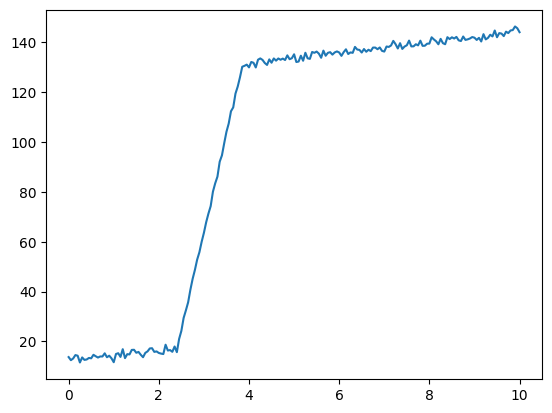

In [2]:
import os
import numpy as np
from scipy.special import erf, erfc
log2 = np.log(2)
s2pi = np.sqrt(2*np.pi)
s2 = np.sqrt(2.0)
# tiny had been numpy.finfo(numpy.float64).eps ~=2.2e16.
# here, we explicitly set it to 1.e-15 == numpy.finfo(numpy.float64).resolution
tiny = 1.0e-15

def not_zero(value):
    """Return value with a minimal absolute size of tiny, preserving the sign.

    This is a helper function to prevent ZeroDivisionError's.

    Parameters
    ----------
    value : scalar
        Value to be ensured not to be zero.

    Returns
    -------
    scalar
        Value ensured not to be zero.

    """
    return float(np.copysign(max(tiny, abs(value)), value))

def step(x, amplitude=1.0, center=0.0, sigma=1.0, form='linear'):
    """Return a step function.

    Starts at 0.0, ends at `sign(sigma)*amplitude`, has a half-max at
    `center`, rising or falling with `form`:

    - `'linear'` (default) = amplitude * min(1, max(0, arg + 0.5))
    - `'atan'`, `'arctan'` = amplitude * (0.5 + atan(arg)/pi)
    - `'erf'`              = amplitude * (1 + erf(arg))/2.0
    - `'logistic'`         = amplitude * [1 - 1/(1 + exp(arg))]

    where ``arg = (x - center)/sigma``.

    Note that ``sigma > 0`` gives a rising step, while ``sigma < 0`` gives
    a falling step.
    """
    out = np.sign(sigma)*(x - center)/max(tiny*tiny, abs(sigma))

    if form == 'erf':
        out = 0.5*(1 + erf(out))
    elif form == 'logistic':
        out = 1. - 1./(1. + np.exp(out))
    elif form in ('atan', 'arctan'):
        out = 0.5 + np.arctan(out)/np.pi
    elif form == 'linear':
        out = np.minimum(1, np.maximum(0, out + 0.5))
    else:
        msg = (f"Invalid value ('{form}') for argument 'form'; should be one "
               "of 'erf', 'logistic', 'atan', 'arctan', or 'linear'.")
        raise ValueError(msg)

    return amplitude*out


def linear(x, slope=1.0, intercept=0.0):
    """Return a linear function.

    linear(x, slope, intercept) = slope * x + intercept

    """
    return slope * x + intercept


x = np.linspace(0, 10, 201)
y = np.ones_like(x)
y[:48] = 0.0
y[48:77] = np.arange(77-48)/(77.0-48)
np.random.seed(0)
y = 110.2 * (y + 9e-3*np.random.randn(x.size)) + 12.0 + 2.22*x

xy_dat = np.column_stack([x, y])

plt.plot(x, y, '-')

built `data` and `function` **`item`** `dict` for `LmfitGlobal` ...

In [3]:
# data dict
data_dict = {
    'xy': xy_dat,         # data_xy, i.e numpy.column_stack([x, y_0, y_1, ..., y_n])
    'xrange': None    # x range in (min, max) of the data range to fit, default is None
    }


func_lst = [
    {
        'func_name': step,
        'init_params' : {
            'amplitude': {'value':100, 'vary':True, 'min':-np.inf, 'max':+np.inf},
            'center': {'value':2.5, 'min':0, 'max':10},
            'sigma': {'value':1, },
        },
        'func_kws': {'form': 'erf'}   # <-- Additional keyword arguments to pass to model function `'func_name'`.
        # YOU CAN PLAY AROUND WITH DIFFERENT 'form' AND SEE THE BEHAVIOR OF THE FIT
    },
    {
        'func_name': linear,
        'init_params' : {
            'slope': {'value':0.0, 'vary':True, 'min':-np.inf, 'max':+np.inf},
            'intercept': {'value':0, },
        },
        'func_kws': {}   # <-- Additional keyword arguments to pass to model function `'func_name'`.
    },
]

# function dict
function_dict = {
    'theory': func_lst,
    'theory_connectors': ['+'],
}


# """
# # --- The `theory_connectors` (list of str): 
#     A list of binary operators (e.g., '+', '-', '*', '/') that define how to combine 
#     the theory functions listed in 'theory'. Each operator connects one function to the next 
#     in left-to-right order. 
    
#     For example: 
#     - ['+', '+'] means: theory[0] + theory[1] + theory[2].

#     - ['+', '*'] means: theory[0] + theory[1] * theory[2].

#     The number of connectors must be exactly one less than the number of theory functions.
#     The ONLY (so-far) supported operators are: '+', '-', '*', '/'.
# """


# items 
items = {
    'data': data_dict,              # 1. data (see above)
    'functions': function_dict,     # 2. thoery (see above)
}

call `LmfitGlobal` ...

In [4]:
LFG = LmfitGlobal(items)
# --- The box below show how the model y(x) (CompositeModel) is define using `theory_connectors` define above ---
# --- it is upto the USER to define how to define the CompositeModel ---
# --- if you are HAPPY proceed NEXT

INFO: Validating data...
INFO: Validating functions...
INFO: Validating nan policy...
INFO: Creating lmfit.Models for the functions...
INFO: Initializing lmfit.Parameters for the functions...
INFO: Setting lmfit fitting/minimization protocols for the functions...
INFO: ######################################################################
INFO: # y(x;) = step(x, amplitude, center, sigma, form) + linear(x, slope, #
INFO: # intercept)                                                         #
INFO: ######################################################################


Name               Value      Min      Max   Stderr     Vary     Expr Brute_Step
c0_amplitude_0       100     -inf      inf     None     True     None     None
c0_center_0          2.5        0       10     None     True     None     None
c0_sigma_0             1     -inf      inf     None     True     None     None
c1_intercept_0         0     -inf      inf     None     True     None     None
c1_slope_0             0     -inf      inf     None     True     None     None


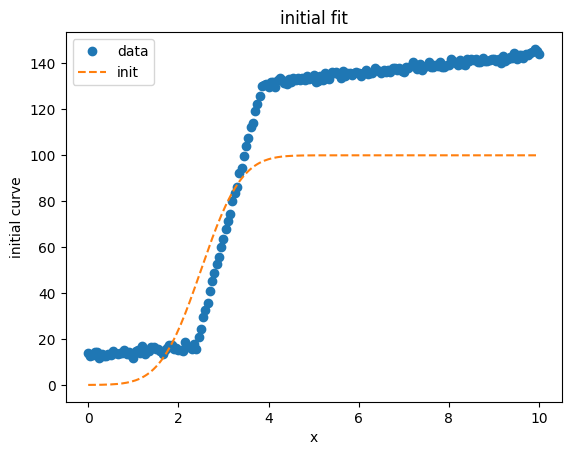

In [5]:
LFG.initial_params.pretty_print()  # pretty print initial parameters

axes0 = LFG.plot_init()  # plot init parameters

fit with iter callback...

In [6]:
def per_iteration(pars, iteration, resid, *args, **kws):
    print(" ITER ", iteration, [f"{p.name} = {p.value:.5f}" for p in pars.values()])

LFG.fit(verbose=False, iter_cb=per_iteration)  # verbose, if True will show fit parameters

print(f'Nfev = {LFG.result.nfev}')

INFO: Fitting DONE...


 ITER  -1 ['c0_amplitude_0 = 100.00000', 'c0_center_0 = 2.50000', 'c0_sigma_0 = 1.00000', 'c1_slope_0 = 0.00000', 'c1_intercept_0 = 0.00000']
 ITER  0 ['c0_amplitude_0 = 100.00000', 'c0_center_0 = 2.50000', 'c0_sigma_0 = 1.00000', 'c1_slope_0 = 0.00000', 'c1_intercept_0 = 0.00000']
 ITER  1 ['c0_amplitude_0 = 100.00000', 'c0_center_0 = 2.50000', 'c0_sigma_0 = 1.00000', 'c1_slope_0 = 0.00000', 'c1_intercept_0 = 0.00000']
 ITER  2 ['c0_amplitude_0 = 100.00100', 'c0_center_0 = 2.50000', 'c0_sigma_0 = 1.00000', 'c1_slope_0 = 0.00000', 'c1_intercept_0 = 0.00000']
 ITER  3 ['c0_amplitude_0 = 100.00000', 'c0_center_0 = 2.50002', 'c0_sigma_0 = 1.00000', 'c1_slope_0 = 0.00000', 'c1_intercept_0 = 0.00000']
 ITER  4 ['c0_amplitude_0 = 100.00000', 'c0_center_0 = 2.50000', 'c0_sigma_0 = 1.00001', 'c1_slope_0 = 0.00000', 'c1_intercept_0 = 0.00000']
 ITER  5 ['c0_amplitude_0 = 100.00000', 'c0_center_0 = 2.50000', 'c0_sigma_0 = 1.00000', 'c1_slope_0 = 0.00001', 'c1_intercept_0 = 0.00000']
 ITER  6 ['c

In [7]:
LFG.report()

[[Model]]
    (Model(step, prefix='c0_') + Model(linear, prefix='c1_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 55
    # data points      = 201
    # variables        = 5
    chi-square         = 593.709621
    reduced chi-square = 3.02913072
    Akaike info crit   = 227.700173
    Bayesian info crit = 244.216698
    R-squared          = 0.99897798
[[Variables]]
    c0_amplitude_0:  112.858622 +/- 0.65391460 (0.58%) (init = 100)
    c0_center_0:     3.13494787 +/- 0.00516600 (0.16%) (init = 2.5)
    c0_sigma_0:      0.67393574 +/- 0.01091151 (1.62%) (init = 1)
    c1_slope_0:      1.87161866 +/- 0.09318566 (4.98%) (init = 0)
    c1_intercept_0:  12.0964537 +/- 0.27605985 (2.28%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(c0_amplitude_0, c1_slope_0)     = -0.8791
    C(c0_amplitude_0, c0_sigma_0)     = +0.5643
    C(c0_sigma_0, c1_slope_0)         = -0.4569
    C(c0_center_0, c1_intercept_0)    = +0.4269
    C(c1_slope_0,

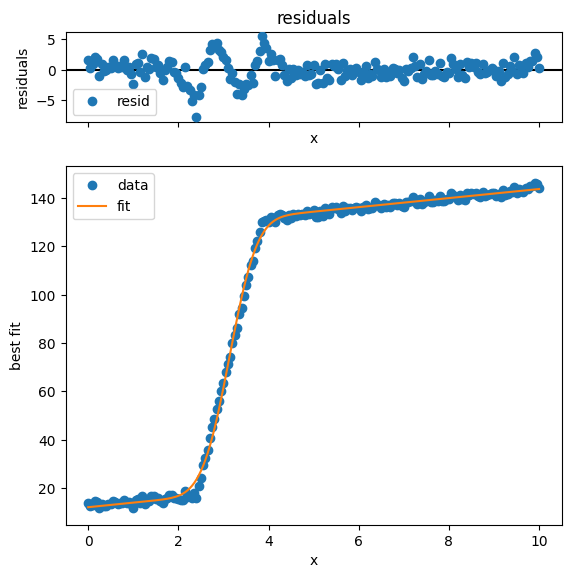

In [8]:
axes1 = LFG.plot(show_init=False)   # plot fit data & residuals and show initial plot (if True)

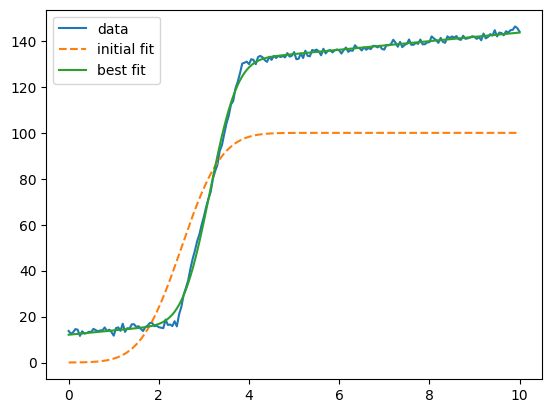

In [9]:
plt.plot(x, y, label='data')

plt.plot(x, LFG.init_fit, '--', label='initial fit')
plt.plot(x, LFG.best_fit, '-', label='best fit')
plt.legend()
plt.show()